FACE DETECTOR

In [1]:
# Import all relevant libraries

import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import npwriter
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# This XML contains the parameters for a classifier used to identify images:

classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
# Assign the image to a variable named 'nc'
# Read the image file
# Convert the image to grayscale and store it in a variable named 'gray_nc'
# DetectMultiScale is used to detect faces in the image and creates a rectangle around the identified image 

nc = r'Training images\NicolasCage_Train.jpg'
image_nc = cv2.imread(nc)
gray_nc = cv2.cvtColor(image_nc, cv2.COLOR_BGR2GRAY)
faces_nc = classifier.detectMultiScale(gray_nc, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [4]:
# Same steps as done with NicholasCage_Train - This is just done for another image 'denzel-washington_train.jpg':

dw = r'Training images\denzel-washington_train.jpg'
image_dw = cv2.imread(dw)
gray_dw = cv2.cvtColor(image_dw, cv2.COLOR_BGR2GRAY)
faces_dw = classifier.detectMultiScale(gray_dw, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [5]:
# Same steps as done with NicholasCage_Train - This is just done for another image 'Dwayne_Johnson_train.jpg':

dj = r'Training images\Dwayne_Johnson_train.jpg'
image_dj = cv2.imread(dj)
gray_dj = cv2.cvtColor(image_dj, cv2.COLOR_BGR2GRAY)
faces_dj = classifier.detectMultiScale(gray_dj, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [6]:
# Create 2 empty lists, that will be used later to store data:

all_list = []
all_names = []

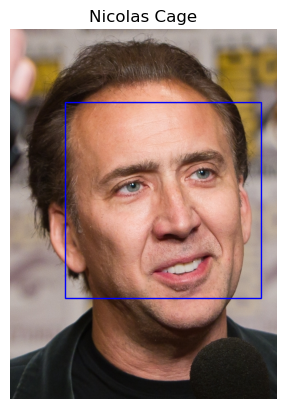

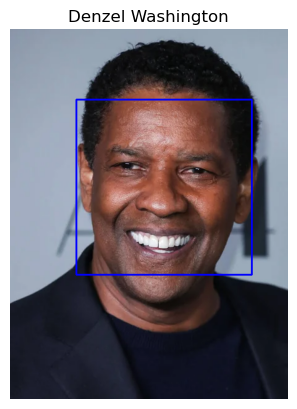

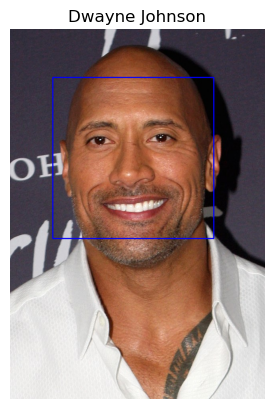

In [7]:
# Iterate through 3 images to:
    # - Detect faces in each image
    # - Name each image with the specified name
    # - Include the grayscale image
# Add a new empty list ('f_list')

for faces, name, gray_image, image in [
    (faces_nc, 'Nicolas Cage', gray_nc, image_nc),
    (faces_dw, 'Denzel Washington', gray_dw, image_dw),
    (faces_dj, 'Dwayne Johnson', gray_dj, image_dj)]:
    f_list = []

# Another iteratation through all images to:
    # - Create a rectangle around the face in image
    # - Extract the coordinates of the face in the grayscale image
    # - Resize the facial image
    # - Flatten/convert the image into data points and append the data to the 'f_list' 

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        face = gray_image[y:y+h, x:x+w]
        face = cv2.resize(face, (100, 100))
        f_list.append(face.reshape(-1))

    # Display the image with detected faces
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title(name)
    plt.axis('off')
    plt.show()

# All the contents in 'f_list' is appended to a master list
# Names associated to the images are added

    all_list.extend(f_list)
    all_names.extend([name] * len(f_list))

In [8]:
# Create a dataframe with full list of data points
# Add the image names as a new column in the dataframe
# Save the dataframe to a csv file (This is done so that the file can be used again in future if required)

concatenated_data = pd.DataFrame(all_list)
concatenated_data['name'] = all_names
concatenated_data.to_csv('concatenated_data.csv', index=False)

In [9]:
# Read the csv file that was created into a dataframe

data = pd.read_csv('concatenated_data.csv')

In [10]:
# Check the first few rows in the dataframe

data.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,name
0,18,15,14,14,13,18,23,43,66,84,...,160,166,170,173,174,173,173,172,173,Nicolas Cage
1,169,169,169,163,134,48,21,21,21,25,...,168,168,168,168,167,167,167,168,168,Denzel Washington
2,51,49,49,51,55,54,53,55,56,51,...,77,70,68,61,30,120,184,209,188,Dwayne Johnson


In [11]:
# Create the x and y features. 
    # - X_train includes all columns other than the name of the image
    # - y_train is only the name column as this is the target of the model - To identify the name of the face in an image

X_train = data.drop(columns = ['name'])
y_train = data['name']

In [12]:
# View first few columns of X_train

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,18,15,14,14,13,18,23,43,66,84,...,161,160,166,170,173,174,173,173,172,173
1,169,169,169,163,134,48,21,21,21,25,...,168,168,168,168,168,167,167,167,168,168
2,51,49,49,51,55,54,53,55,56,51,...,76,77,70,68,61,30,120,184,209,188


In [13]:
# View first few columns of y_train

y_train.head()

0         Nicolas Cage
1    Denzel Washington
2       Dwayne Johnson
Name: name, dtype: object

In [14]:
# Create a KNN model that considers the closest neighbour when making predictions
# Train the model by fitting the X and y training features

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
# Create a list with 4 files/images:

test_images = [r'Test images\NicholasCage_Test.jpg', 'Test images\denzel-washington_test.jpg', 'Test images\denzel-washington_train_test.jpg', 'Test images\Dwayne_Johnson_train_test.jpg']

In [16]:
# Create an empty list, that will be used later to store data:

test_data = []

In [17]:
# Iterate through the test images to: 
    # Read the image files
    # Convert the images to grayscale and store it in a variable named 'gray'
    # DetectMultiScale is used to detect faces in the image and creates a rectangle around the identified image 

for img in test_images:
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Another iteratation through all images to:
    # - Extract the coordinates of the face in the grayscale image
    # - Resize the facial image
    # - Flatten/convert the image into data points and append the data to the 'test_data' list 

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (100, 100))
        face_flattened = face.reshape(-1)
        
        test_data.append(face_flattened)

In [18]:
# Create a dataframe with the full list of test data points

test_df = pd.DataFrame(test_data)

In [19]:
# Save the dataframe to a csv file (This is done so that the file can be used again in future if required)

test_df.to_csv('test_data.csv', index=0)

In [20]:
# Check the first few rows in the dataframe

test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,45,10,9,10,11,13,10,6,9,10,...,147,146,147,146,145,146,144,145,145,144
1,31,35,40,42,39,41,43,45,46,47,...,83,83,83,84,84,84,84,85,85,85
2,169,169,169,163,134,48,21,21,21,25,...,168,168,168,168,168,167,167,167,168,168
3,51,49,49,51,55,54,53,55,56,51,...,76,77,70,68,61,30,120,184,209,188


In [21]:
# The trained KNN model makes predictions on the new test data

predictions = knn.predict(test_df)

c:\Users\CP372008\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [22]:
# A final iteration is created that prints the test file name and the predicted label the model assigned

for img, pred in zip(test_images, predictions):
    print(f"Prediction for {img}: {pred}")

Prediction for Test images\NicholasCage_Test.jpg: Dwayne Johnson
Prediction for Test images\denzel-washington_test.jpg: Dwayne Johnson
Prediction for Test images\denzel-washington_train_test.jpg: Denzel Washington
Prediction for Test images\Dwayne_Johnson_train_test.jpg: Dwayne Johnson


# FINAL NOTE

The model was trained with 3 images which inlcuded 3 different actors.

The model was then tested with 2 new images that included 2/3 of the same actors (Just different images of the actors).

The model made a prediction on these test images, but inaccurately labled these images.

To test whether the model does actually work, I created copies of 2/3 images used in training and included these in the test data as well.

The model was able to accurately label these images.

I conclude that the model does work, but it is not generalizing well as it had limited training data. To overcome this, we should train the model with more data so that it has more diversity in training and is able to generalize better. The model is also overfitting as it memorized the training examples too well and now doesn't generalize well.  